In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
working_dir = r'../../../../outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Total Persons

In [4]:
df = load_data('person_type')
df.groupby('source').sum()[['psexpfac']].T

source,model,survey
psexpfac,"4,356,032","3,938,628"


# Total Households

In [5]:
df = load_data('household_size_vehs_workers')
df.groupby('source').sum()[['hhexpfac']].T

source,model,survey
hhexpfac,"1,736,129","1,660,179"


# Total Trips

In [6]:
df = load_data('trip_total')
df.groupby('source').sum()[['trexpfac']].T

source,model,survey
trexpfac,"16,491,066","14,231,175"


# Total Tours

In [7]:
df = load_data('tour_purpose_mode')
df.groupby('source').sum()[['toexpfac']].T

source,model,survey
toexpfac,"5,846,821","5,095,149"


## Average Household Size

In [8]:
pd.options.display.float_format = '{:0,.2f}'.format
df = load_data('household_size_vehs_workers')
pd.DataFrame(
    df.groupby('source').apply(
        lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
        columns=['avg_hh_size'])

,avg_hh_size
source,
model,2.51
survey,2.48


## Average Trips per Person

## Average Distance to Work

In [9]:
df = load_data('trip_averages')
df[df['dpurp'] == 'Work'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       4.59     30.62      0.00
           survey      2.86     19.09      0.00
HOV2       model       8.75     19.62      1.94
           survey      6.93     16.90      0.06
HOV3+      model       9.25     20.33      2.06
           survey     10.35     20.96      0.11
SOV        model       8.53     19.53      1.81
           survey      8.54     19.56      0.16
School Bus model       3.39     10.28      0.68
TNC        model       2.30     10.14      0.48
           survey      3.72     13.44      0.01
Transit    model      11.04     43.07      1.49
           survey      7.45     32.32      3.08
Walk       model       0.69     13.81      0.00
           survey      0.80     17.50      0.00

## Average Distance to School

In [10]:
df[df['dpurp'] == 'School'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       2.60     17.33      0.00
           survey      2.04     12.26      0.00
HOV2       model       2.93      9.78      0.59
           survey      3.60     11.29      0.08
HOV3+      model       3.03      9.96      0.61
           survey      4.09     11.93      0.01
SOV        model       5.66     14.74      1.18
           survey      8.23     18.28      0.30
School Bus model       2.97      9.89      0.60
           survey      3.30     10.40      0.00
TNC        model       2.27      8.86      0.46
           survey      2.25     14.51      0.00
Transit    model       5.48     36.52      0.43
           survey      8.07     24.15      2.97
Walk       model       1.33     26.56      0.00
           survey      0.75     15.00      0.00

## Transit Pass Ownership

In [11]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('parking_transit_pass')
pd.pivot_table(df, index='ptpass',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
ptpass,,
0,"3,580,829","2,931,969"
1,"775,203","1,006,659"


In [12]:
pd.pivot_table(df[df['ptpass']==1], 
               index='pptyp',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
pptyp,,
Child Age 5-15,"2,021",NaN
Full-Time Worker,"533,845","532,071"
High School Student Age 16+,"99,650",NaN
Non-Working Adult Age 65+,249,"160,319"
Non-Working Adult Age <65,"16,318","150,270"
Part-Time Worker,"45,097","136,436"
University Student,"78,023","27,562"


# Auto Ownership

In [13]:
df = load_data('auto_ownership')
df.loc[df['hhvehs'] >= 3, 'hhvehs'] = '3+'
df.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')

source,model,survey
hhvehs,,
-1.0,NaN,626
0.0,"141,128","166,015"
1.0,"583,975","489,872"
2.0,"624,531","608,416"
3+,"386,495","395,250"


## By Income

In [14]:
df = load_data('auto_ownership')

# Define income groups
inc_bin=[-1,20000,40000,60000,75000,9999999999999]
inc_bin_labels = ['0-$20k','$20-40k','$40-60k','$60-75k','>$75k']
df['income_bin'] = pd.cut(df['hhincome_thousands'], bins=inc_bin, labels=inc_bin_labels)

df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'

pd.pivot_table(df, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

income_bin     0-$20k  $20-40k  $40-60k  $60-75k   >$75k
hhvehs source                                           
-1.0   model        0        0        0        0       0
       survey       0        0        0        0     626
0.0    model   55,447   21,063   14,384    5,528  44,690
       survey  83,091   36,089   10,782        0  36,053
1.0    model   74,986   82,216   86,235   40,880 299,548
       survey 112,204   84,824   87,913        0 204,932
2.0    model   29,590   41,697   57,118   32,976 463,063
       survey  97,708   28,394   82,252        0 400,062
3.0    model    8,190   12,342   18,307   11,087 204,936
       survey  47,799   10,876   22,726        0 177,862
4+     model    3,239    4,787    8,354    5,087 110,059
       survey  33,443    8,019    7,406        0  87,119

In [15]:
pd.options.display.float_format = "{:,.2%}".format
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()

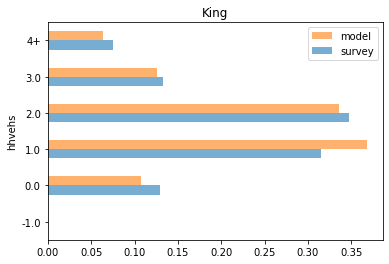

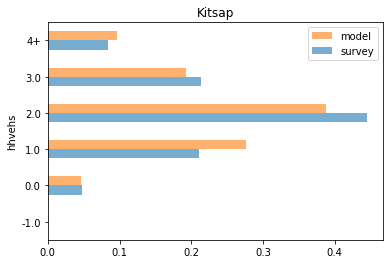

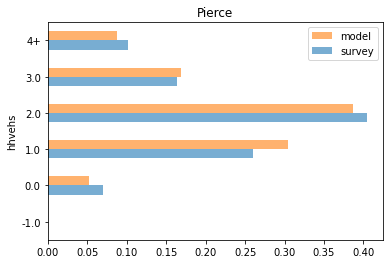

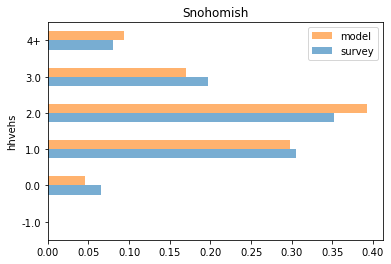

In [16]:
for county in df['hh_county'].unique():
    _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
    _df.columns = ['survey','model']
    _df.plot(kind='barh', title=county, legend='reverse', alpha=0.6)


## Total Workers by Home County
Model

In [17]:
df = load_data('work_flows')
pd.options.display.float_format = '{:0,.0f}'.format
df.rename(columns={'person_county': 'Home County', 'person_work_county':'Work County'}, inplace=True)

pd.pivot_table(df[df['source'] == 'model'], index='Home County', columns='Work County', aggfunc='sum')

psexpfac                         
Work County      King Kitsap  Pierce Snohomish
Home County                                   
King        1,165,490  2,029  46,732    44,525
Kitsap         19,120 91,102   8,490       765
Pierce        107,091  8,832 290,233     1,088
Snohomish     158,793    207   1,158   268,474